In [ ]:
import csv

with open('data-files/subway-data.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    for row in data:
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        result.append(row[10])
        
print(len(result))
print(result)

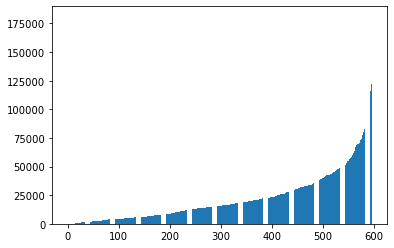

In [7]:
import matplotlib.pyplot as plt

result.sort()
plt.bar(range(len(result)), result)
plt.show()

In [ ]:
#7~9시 승차 인원

import csv

with open('data-files/subway-data.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    for row in data:
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        result.append(sum(row[10:15:2]))
        
print(len(result))
print(result)

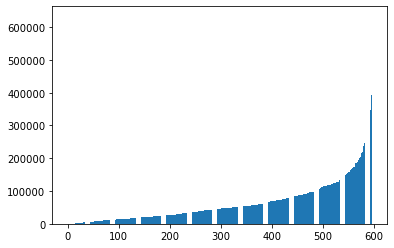

In [10]:
import matplotlib.pyplot as plt

result.sort()
plt.bar(range(len(result)), result)
plt.show()

In [14]:
# 7~9시 승차인원 합계의 최대값.
import csv

with open('data-files/subway-data.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    mx = 0   # 최대값 변수 설정
    mx_station = '' # 최댓값 갖는 역 이름 변수 설정
    
    for row in data:
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        if sum(row[10:15:2]) > mx:
            mx = sum(row[10:15:2])
            mx_station = row[3] +'('+row[1]+')'   #'('+row[1]+')' = 몇 호선인지 표시.
        
print(mx_station, mx)

신림(2호선) 631860


In [ ]:
## 호선은 같으나 중복되는 역은 따로 처리 안함.

import csv

with open('data-files/subway-data.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)
    next(data)
    mx = 0   # 최대값 변수 설정
    mx_station = '' # 최댓값 갖는 역 이름 변수 설정
    t = int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요? : '))
    
    for row in data:
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        a = row[4+(t-4)*2]
        if a > mx:
            mx = a
            mx_station = row[3] +'('+row[1]+')'   #'('+row[1]+')' = 몇 호선인지 표시.
        
print(mx_station, mx)

In [2]:
import csv
with open ('data-files/population.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)
    home = []
    name = input('인구 구조가 알고 싶은 지역 이름을 입력하시오: ')
    
    for row in data:
        row[1:] = map(lambda x: int(x.replace(',',"")),row[1:])
        if name in row[0]:
            for idx in row[3:]:
                home.append(int(idx))
    print(home)

인구 구조가 알고 싶은 지역 이름을 입력하시오:  화곡제1동


[364, 349, 348, 334, 333, 302, 266, 247, 248, 247, 209, 222, 252, 230, 229, 229, 241, 284, 339, 426, 451, 509, 595, 755, 955, 999, 1166, 1222, 1335, 1191, 1223, 1165, 1124, 1150, 1093, 1031, 1022, 1051, 1080, 976, 983, 852, 740, 712, 661, 712, 744, 815, 746, 753, 734, 830, 668, 704, 744, 757, 711, 783, 786, 923, 895, 866, 753, 744, 727, 751, 559, 593, 559, 482, 555, 471, 509, 470, 267, 337, 319, 302, 280, 219, 213, 206, 152, 136, 109, 99, 69, 63, 64, 49, 29, 30, 23, 20, 11, 11, 13, 3, 7, 4, 19]


In [ ]:
import numpy as np
import csv


with open ('data-files/population.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)

    name = input('인구 구조가 알고 싶은 지역 이름을 입력하시오: ')

    for row in data:
        row[1:] = map(lambda x: int(x.replace(',',"")),row[1:])
        if name in row[0]:
#             home = np.array(row[3:], dtype=int)
            home = np.array(row[3:], dtype=int) / int(row[2])  # 비율 구하기
print(home)

import matplotlib.pyplot as plt
plt.rc('font', family = "Malgun Gothic")
plt.title(name + '지역의 인구 구조')
plt.plot(home)
plt.show()

인구 구조가 알고 싶은 지역 이름을 입력하시오:  화곡제1동


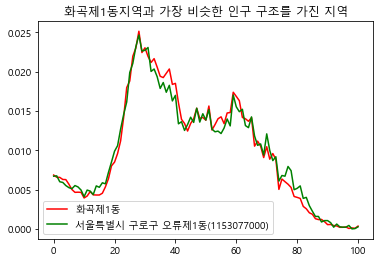

In [29]:
import numpy as np
import csv


with open ('data-files/population.csv', encoding = 'utf-8' ) as f:
    data = csv.reader(f)
    next(data)
    data = list(data)
    name = input('인구 구조가 알고 싶은 지역 이름을 입력하시오: ')

    mn = 1    # 0을 넣으면 값에 영향을 미친다. 최소 1로 봐야 함.
    result_name =''
    result = 0
    
    for row in data:
        row[1:] = map(lambda x: int(x.replace(',',"")),row[1:])
        if name in row[0]:
#             home = np.array(row[3:], dtype=int)
            home = np.array(row[3:], dtype=int) / int(row[2])  # 비율 구하기
    for row in data:
        home2 = np.array(row[3:], dtype=int) / int(row[2]) 
#         print(home[:4] - home2[:4])
        s = np.sum((home-home2)**2)
        if s < mn and name not in row[0]:
            mn = s
            result_name = row[0]
            result = home2

import matplotlib.pyplot as plt
plt.rc('font', family = "Malgun Gothic")
plt.title(name+ '지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name , c='red' )
plt.plot(result, label=result_name, c='green')
plt.legend()
plt.show()

In [12]:
import pandas as pd
import numpy as np

In [14]:
lst=pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', 
                 index_col=0)  #  index_col=0 : 표 0번쨰에 있는걸 index로 사용 하겠다. 
summer = pd.DataFrame(lst)
summer = lst[1].iloc[:-1, :5]
columns =['games', 'gold', 'silver', 'bronze', 'total']
summer.columns = columns
summer.head()

,games,gold,silver,bronze,total
Afghanistan (AFG),14,0,0,2,2
Algeria (ALG),13,5,4,8,17
Argentina (ARG),24,21,25,28,74
Armenia (ARM),6,2,6,6,14
Australasia (ANZ) [ANZ],2,3,4,5,12


In [4]:
summer["gold"].sum() , summer["gold"].mean() , summer['gold'].max(), summer['gold'].min()

(5115, 33.651315789473685, 1022, 0)

In [18]:
# 위 작업을 다른 방식으로 처리
lst=pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', 
                 index_col=0)  #  index_col=0 : 표 0번쨰에 있는걸 index로 사용 하겠다.  
summer = lst[1].iloc[:, :5]
columns =['games', 'gold', 'silver', 'bronze', 'total']
summer.columns = columns
summer.head()

,games,gold,silver,bronze,total
Afghanistan (AFG),14,0,0,2,2
Algeria (ALG),13,5,4,8,17
Argentina (ARG),24,21,25,28,74
Armenia (ARM),6,2,6,6,14
Australasia (ANZ) [ANZ],2,3,4,5,12


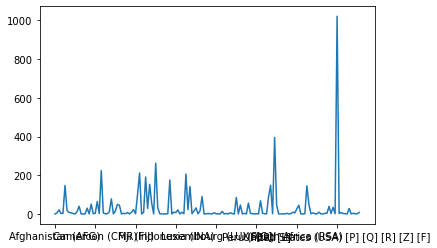

In [19]:
summer.iloc[:-1, 1].plot()